In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

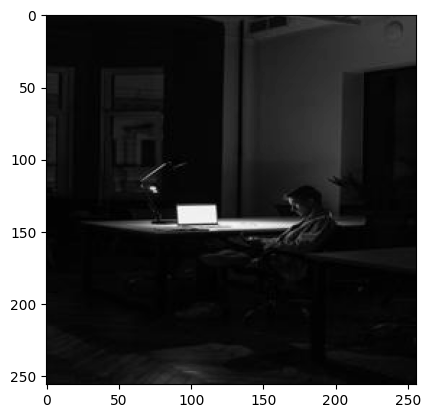

In [5]:
#load image
img = cv2.imread('./detective.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [3]:
#Defice a function that returns the pdf of the image
def create_pdf(img):
    return pdf

In [4]:
# Define a function that returns the cdf of the pdf the image
def create_cdf(pdf):
    return cdf

In [ ]:
# Define the function that applies "Histogram equalization" on a given input image
def histogram_equalization(im_in):
  return eq_im

In [ ]:
# Plot the pdf, cdf and image before and after histogram equalization